In [1]:
import torch
import pandas as pd
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
import torchvision.models as models
import torchvision.transforms
import torchaudio
import torchaudio.transforms as T
import librosa

from torchvision.models import ResNet

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [2]:
sig,_ = librosa.load("D:/project/voice_pathology_ai/voice_data/fusion/healthy/phrase/1-phrase.wav",sr=16000)

In [3]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)
y = smile.process_file("D:/project/voice_pathology_ai/voice_data/fusion/healthy/phrase/1-phrase.wav")

In [4]:
sig

array([0.00062774, 0.00136639, 0.00109393, ..., 0.00089322, 0.00074682,
       0.        ], dtype=float32)

In [25]:
handcrafted = smile.process_signal(
                sig,
                16000
            )

In [29]:
torch.from_numpy(handcrafted.to_numpy()).size()

torch.Size([1, 6373])

In [11]:
y.reset_index(drop=True)

# feature scale 조절도 필요.

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,2.271744,0.255102,0.0,0.399389,0.665472,1.073285,0.266083,0.407812,0.673896,0.080488,...,9.021909,0.544175,3.330909,3.4473,-15.953115,0.439667,125.111931,61.925774,105.369995,57.428726


In [20]:
y.reset_index(drop=True).to_numpy().flatten()

# feature scale 조절도 필요.

array([  2.2717435 ,   0.25510204,   0.        , ...,  61.925774  ,
       105.369995  ,  57.428726  ], dtype=float32)

In [4]:
pip install --upgrade numpy --user

Note: you may need to restart the kernel to use updated packages.


In [6]:
from disvoice.glottal import Glottal
glottal=Glottal()
file_audio="D:/project/voice_pathology_ai/voice_data/fusion/healthy/phrase/1-phrase.wav"
features=glottal.extract_features_file(file_audio, static=True, plots=False, fmt="dataframe")


KeyboardInterrupt: 

In [7]:
from disvoice.glottal import Glottal
glottal=Glottal()
glottal_signal, g_iaif, GCIs=glottal.extract_glottal_signal(sig,16000)


d:\anaconda3\envs\local_torch\lib\site-packages\scipy\signal\_signaltools.py:2103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.asarray(y)


In [8]:
glottal.extract_features_signal(sig,16000,static=True)

array([[ 5.69489820e-03,  1.32946638e-02,  5.51129866e-03,
         3.89621974e-01,  2.30076649e-01,  9.38875739e+00,
         8.00691704e+00,  5.10505442e+02,  5.77792795e+03,
         9.55749563e-03,  4.50539418e-03,  1.44934862e-03,
         1.43950151e-01,  5.04574301e-01,  2.75224675e+00,
         3.43906163e+00,  1.94916355e+03,  1.36810000e+04,
         3.11290894e+00, -4.78964325e-01,  2.84734100e-01,
         2.15765375e+00,  4.96428973e+00,  2.67111803e-01,
         1.04812448e+00,  2.41166906e+00,  2.58540984e+00,
         1.14897118e+01, -1.02063137e+00,  7.33569404e-02,
         8.13378665e+00,  2.50345577e+01,  6.77606354e-01,
         1.39952852e+00,  4.39424691e+00,  4.78374540e+00]])

In [ ]:
NAQ, QOQ, T1, T2, H1H2, HRF = glottal.get_vq_params(
    gframe, dgframe, fs, gci_s)

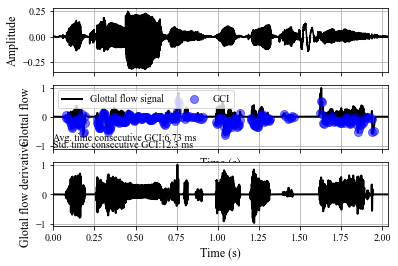

In [45]:
glottal.plot_glottal(sig, 16000, GCIs, g_iaif, glottal_signal)

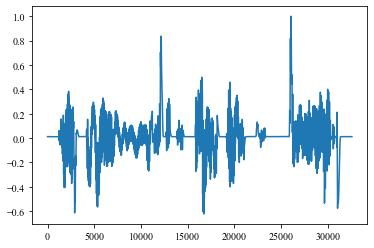

In [40]:
from matplotlib import pyplot as plt
plt.plot(glottal)

In [36]:
features.columns#현재 feature 5개 뿐.

Index(['global avg var GCI', 'global avg avg NAQ', 'global avg std NAQ',
       'global avg avg QOQ', 'global avg std QOQ', 'global avg avg H1H2',
       'global avg std H1H2', 'global avg avg HRF', 'global avg std HRF',
       'global std var GCI', 'global std avg NAQ', 'global std std NAQ',
       'global std avg QOQ', 'global std std QOQ', 'global std avg H1H2',
       'global std std H1H2', 'global std avg HRF', 'global std std HRF',
       'global skewness var GCI', 'global skewness avg NAQ',
       'global skewness std NAQ', 'global skewness avg QOQ',
       'global skewness std QOQ', 'global skewness avg H1H2',
       'global skewness std H1H2', 'global skewness avg HRF',
       'global skewness std HRF', 'global kurtosis var GCI',
       'global kurtosis avg NAQ', 'global kurtosis std NAQ',
       'global kurtosis avg QOQ', 'global kurtosis std QOQ',
       'global kurtosis avg H1H2', 'global kurtosis std H1H2',
       'global kurtosis avg HRF', 'global kurtosis std HRF'],
    

In [3]:
pip uninstall disvoice

In [4]:
pip install "numpy<1.21.0" --user

Note: you may need to restart the kernel to use updated packages.
